In [1]:
install.packages("ggplot2")
library("ggplot2")
install.packages("ggpubr")
library("ggpubr")
install.packages("cowplot")
library("cowplot")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\Rtmpi0GEMD\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 4.0.4"


package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\Rtmpi0GEMD\downloaded_packages


Warning message:
"package 'ggpubr' was built under R version 4.0.4"


package 'cowplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\Rtmpi0GEMD\downloaded_packages


Warning message:
"package 'cowplot' was built under R version 4.0.4"

Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




In [2]:
x <- read.csv("gen_X_raw_ForRatios.csv")
y <- read.csv("gen_Y_raw_ForRatios.csv")
z <- read.csv("gen_Z_raw_ForRatios.csv")

In [3]:
acerifolia_x <- subset(x, species_position == "acerifolia_x")
aestivalis_x <- subset(x, species_position == "aestivalis_x")
cinerea_x <- subset(x, species_position == "cinerea_x")
labrusca_x <- subset(x, species_position == "labrusca_x")
palmata_x <- subset(x, species_position == "palmata_x")
riparia_x <- subset(x, species_position == "riparia_x")
rupestris_x <- subset(x, species_position == "rupestris_x")
vulpina_x <- subset(x, species_position == "vulpina_x")

In [4]:
acerifolia_y <- subset(y, species_position == "acerifolia_y")
aestivalis_y <- subset(y, species_position == "aestivalis_y")
cinerea_y <- subset(y, species_position == "cinerea_y")
labrusca_y <- subset(y, species_position == "labrusca_y")
palmata_y <- subset(y, species_position == "palmata_y")
riparia_y <- subset(y, species_position == "riparia_y")
rupestris_y <- subset(y, species_position == "rupestris_y")
vulpina_y <- subset(y, species_position == "vulpina_y")

In [5]:
acerifolia_z <- subset(z, species_position == "acerifolia_z")
aestivalis_z <- subset(z, species_position == "aestivalis_z")
cinerea_z <- subset(z, species_position == "cinerea_z")
labrusca_z <- subset(z, species_position == "labrusca_z")
palmata_z <- subset(z, species_position == "palmata_z")
riparia_z <- subset(z, species_position == "riparia_z")
rupestris_z <- subset(z, species_position == "rupestris_z")
vulpina_z <- subset(z, species_position == "vulpina_z")

In [6]:
acerifolia_xy <- acerifolia_x[3:21]/acerifolia_y[3:21]
aestivalis_xy <- aestivalis_x[3:21]/aestivalis_y[3:21]
cinerea_xy <- cinerea_x[3:21]/cinerea_y[3:21]
labrusca_xy <- labrusca_x[3:21]/labrusca_y[3:21]
palmata_xy <- palmata_x[3:21]/palmata_y[3:21]
riparia_xy <- riparia_x[3:21]/riparia_y[3:21]
rupestris_xy <- rupestris_x[3:21]/rupestris_y[3:21]
vulpina_xy <- vulpina_x[3:21]/vulpina_y[3:21]

In [7]:
acerifolia_xz <- acerifolia_x[3:21]/acerifolia_z[3:21]
aestivalis_xz <- aestivalis_x[3:21]/aestivalis_z[3:21]
cinerea_xz <- cinerea_x[3:21]/cinerea_z[3:21]
labrusca_xz <- labrusca_x[3:21]/labrusca_z[3:21]
palmata_xz <- palmata_x[3:21]/palmata_z[3:21]
riparia_xz <- riparia_x[3:21]/riparia_z[3:21]
rupestris_xz <- rupestris_x[3:21]/rupestris_z[3:21]
vulpina_xz <- vulpina_x[3:21]/vulpina_z[3:21]

In [8]:
acerifolia_yz <- acerifolia_y[3:21]/acerifolia_z[3:21]
aestivalis_yz <- aestivalis_y[3:21]/aestivalis_z[3:21]
cinerea_yz <- cinerea_y[3:21]/cinerea_z[3:21]
labrusca_yz <- labrusca_y[3:21]/labrusca_z[3:21]
palmata_yz <- palmata_y[3:21]/palmata_z[3:21]
riparia_yz <- riparia_y[3:21]/riparia_z[3:21]
rupestris_yz <- rupestris_y[3:21]/rupestris_z[3:21]
vulpina_yz <- vulpina_y[3:21]/vulpina_y[3:21]

In [52]:
acerifolia_xy_avg <- c(1:19)
acerifolia_xy_avg_grp <- c(1:19)
for (i in 1:19){
    acerifolia_xy_avg[i] <- mean(acerifolia_xy[,i]) -1
    if (acerifolia_xy_avg[i] > 0){
        acerifolia_xy_avg_grp[i] = 1
    }
    else{
        acerifolia_xy_avg_grp[i] = 0
    }
}
acerifolia_xy_avg <- data.frame( ions = c(names(acerifolia_xy)), avg = acerifolia_xy_avg, grp = as.factor(acerifolia_xy_avg_grp))

The code above does a few things in the following order: First, it calls in different dfs for each leaf age. It then subsets these based on species such that we have 24 dataframes total after this operation. Then the code computes the ratios for different ages. This program is focused on the ratio for x:y, so these are then averaged (since each species has multiple individuals) to yield one average ratio for each species and ion. Then the program shifts everything down one, such that the ratios less than one (indicating a higher concentration of a given ion in the Y leaf) are now negative. This is purely to aid in visualization. Then, each value is assigned a value based on being positive or negative, such that these groups can be colored differently, again, purely to aid in visualization. 

In [10]:
aestivalis_xy_avg <- c(1:19)
aestivalis_xy_avg_grp <- c(1:19)
for (i in 1:19){
    aestivalis_xy_avg[i] <- mean(aestivalis_xy[,i]) - 1
    if (aestivalis_xy_avg[i] > 0){
        aestivalis_xy_avg_grp[i] = 1
    }
    else{
        aestivalis_xy_avg_grp[i] = 0
    }
}
aestivalis_xy_avg <- data.frame( ions = c(names(aestivalis_xy)), avg = aestivalis_xy_avg, grp = as.factor(aestivalis_xy_avg_grp))

In [11]:
cinerea_xy_avg <- c(1:19)
cinerea_xy_avg_grp <- c(1:19)
for (i in 1:19){
    cinerea_xy_avg[i] <- mean(cinerea_xy[,i]) - 1
    if (cinerea_xy_avg[i] > 0){
        cinerea_xy_avg_grp[i] = 1
    }
    else{
        cinerea_xy_avg_grp[i] = 0
    }
}
cinerea_xy_avg <- data.frame( ions = c(names(cinerea_xy)), avg = cinerea_xy_avg, grp = as.factor(cinerea_xy_avg_grp))

In [12]:
labrusca_xy_avg <- c(1:19)
labrusca_xy_avg_grp <- c(1:19)
for (i in 1:19){
    labrusca_xy_avg[i] <- mean(labrusca_xy[,i]) - 1
    if (labrusca_xy_avg[i] > 0){
        labrusca_xy_avg_grp[i] = 1
    }
    else{
        labrusca_xy_avg_grp[i] = 0
    }
}
labrusca_xy_avg <- data.frame( ions = c(names(labrusca_xy)), avg = labrusca_xy_avg, grp = as.factor(labrusca_xy_avg_grp))

In [13]:
palmata_xy_avg <- c(1:19)
palmata_xy_avg_grp <- c(1:19)
for (i in 1:19){
    palmata_xy_avg[i] <- mean(palmata_xy[,i]) - 1
    if (palmata_xy_avg[i] > 0){
        palmata_xy_avg_grp[i] = 1
    }
    else{
        palmata_xy_avg_grp[i] = 0
    }
}
palmata_xy_avg <- data.frame( ions = c(names(palmata_xy)), avg = palmata_xy_avg, grp = as.factor(palmata_xy_avg_grp))

In [14]:
riparia_xy_avg <- c(1:19)
riparia_xy_avg_grp <- c(1:19)
for (i in 1:19){
    riparia_xy_avg[i] <- mean(riparia_xy[,i]) - 1
    if (riparia_xy_avg[i] > 0){
        riparia_xy_avg_grp[i] = 1
    }
    else{
        riparia_xy_avg_grp[i] = 0
    }
}
riparia_xy_avg <- data.frame( ions = c(names(riparia_xy)), avg = riparia_xy_avg, grp = as.factor(riparia_xy_avg_grp))

In [15]:
rupestris_xy_avg <- c(1:19)
rupestris_xy_avg_grp <- c(1:19)
for (i in 1:19){
    rupestris_xy_avg[i] <- mean(rupestris_xy[,i]) - 1
    if (rupestris_xy_avg[i] > 0){
        rupestris_xy_avg_grp[i] = 1
    }
    else{
        rupestris_xy_avg_grp[i] = 0
    }
}
rupestris_xy_avg <- data.frame( ions = c(names(rupestris_xy)), avg = rupestris_xy_avg, grp = as.factor(rupestris_xy_avg_grp))

In [16]:
vulpina_xy_avg <- c(1:19)
vulpina_xy_avg_grp <- c(1:19)
for (i in 1:19){
    vulpina_xy_avg[i] <- mean(vulpina_xy[,i]) - 1
    if (vulpina_xy_avg[i] > 0){
        vulpina_xy_avg_grp[i] = 1
    }
    else{
        vulpina_xy_avg_grp[i] = 0
    }
}
vulpina_xy_avg <- data.frame( ions = c(names(vulpina_xy)), avg = vulpina_xy_avg, grp = as.factor(vulpina_xy_avg_grp))

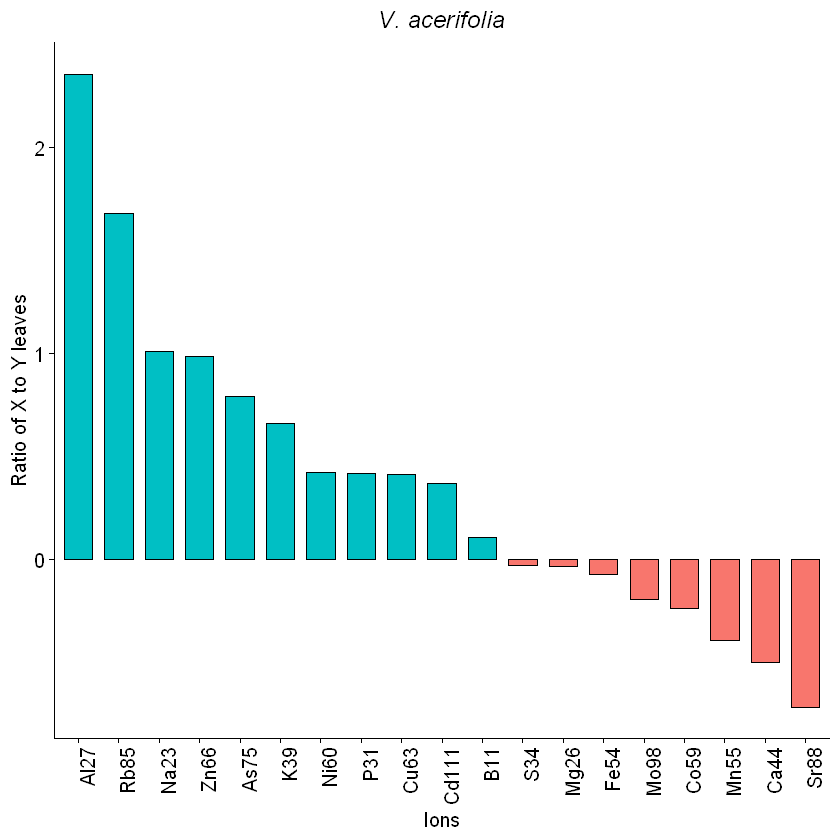

In [53]:
a <- ggbarplot(acerifolia_xy_avg, y = "avg", x = "ions",
               sort.val = "desc",
               fill = "grp",
               sort.by.groups = FALSE,
               x.text.angle = 90)
a <- a + ylab("Ratio of X to Y leaves")
a <- a + xlab("Ions")
a <- a + labs(title = "V. acerifolia")
a <- a + theme(plot.title = element_text(hjust = .5, face = "italic"), legend.position = "none")
a

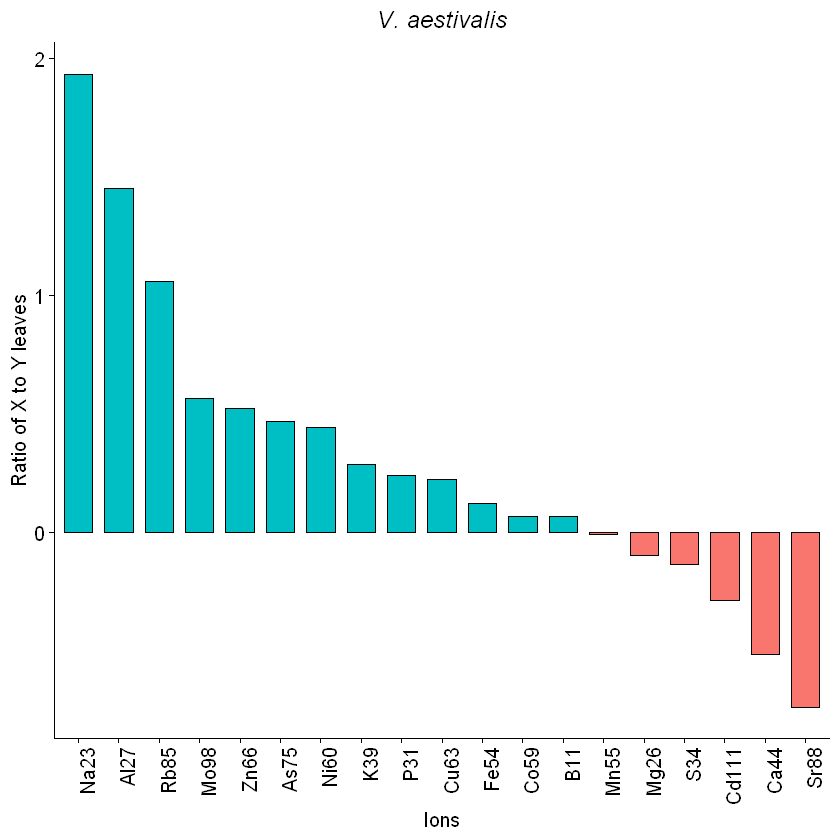

In [42]:
b <- ggbarplot(aestivalis_xy_avg, y = "avg", x = "ions",
               sort.val = "desc",
               fill = "grp",
               sort.by.groups = FALSE,
               x.text.angle = 90)
b <- b + ylab("Ratio of X to Y leaves")
b <- b + xlab("Ions")
b <- b + labs(title = "V. aestivalis")
b <- b + theme(plot.title = element_text(hjust = .5, face = "italic"), legend.position = "none")
b

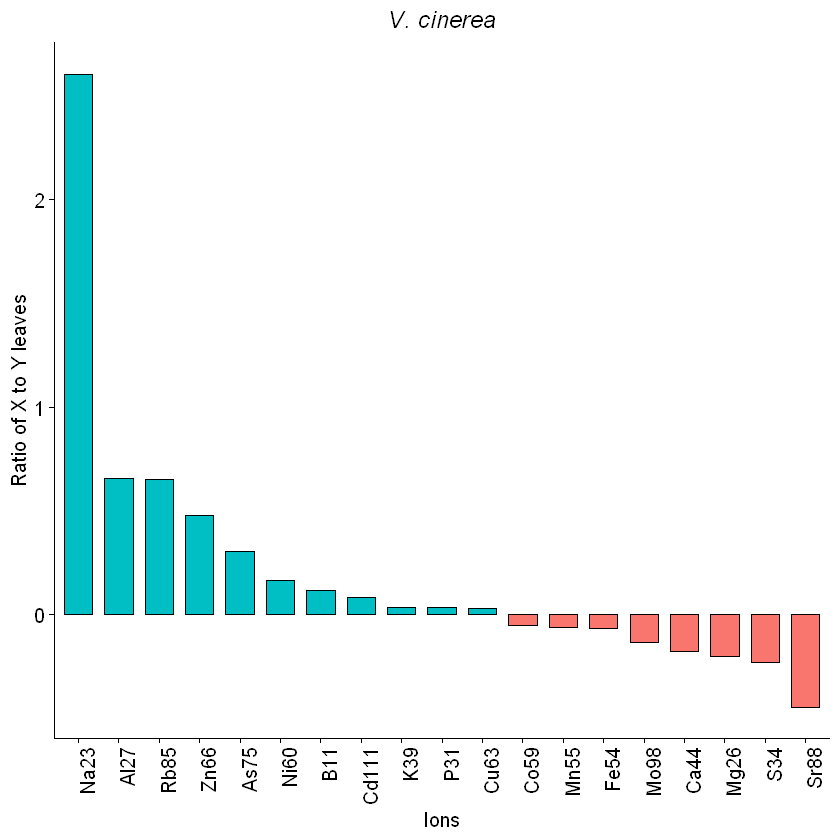

In [43]:
c <- ggbarplot(cinerea_xy_avg, y = "avg", x = "ions",
               sort.val = "desc",
               fill = "grp",
               sort.by.groups = FALSE,
               x.text.angle = 90)
c <- c + ylab("Ratio of X to Y leaves")
c <- c + xlab("Ions")
c <- c + labs(title = "V. cinerea")
c <- c + theme(plot.title = element_text(hjust = .5, face = "italic"), legend.position = "none")
c

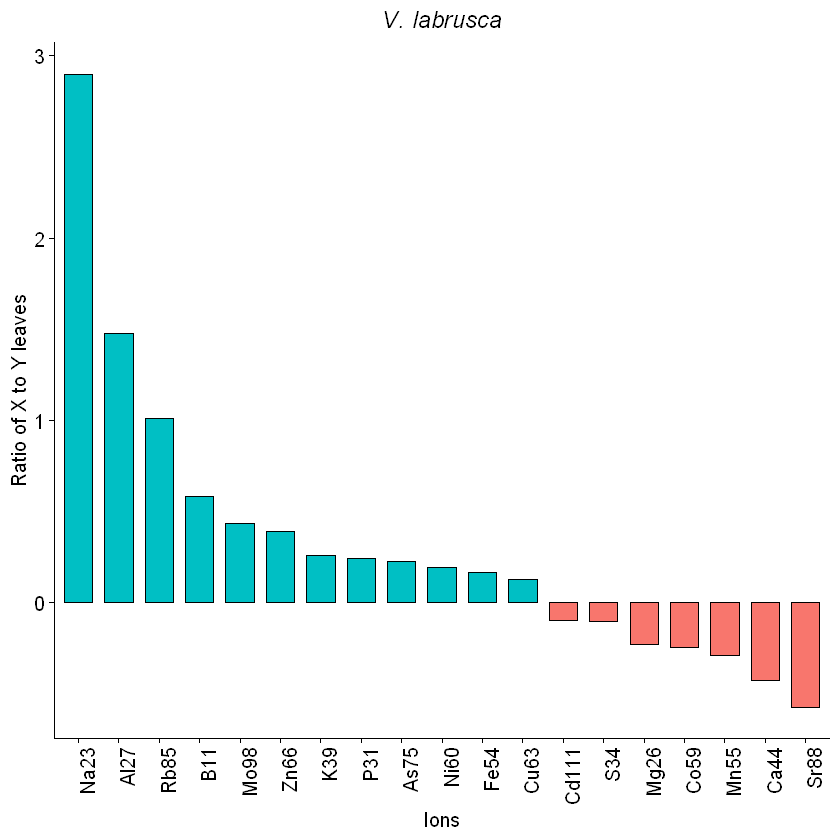

In [44]:
d <- ggbarplot(labrusca_xy_avg, y = "avg", x = "ions",
               sort.val = "desc",
               fill = "grp",
               sort.by.groups = FALSE,
               x.text.angle = 90)
d <- d + ylab("Ratio of X to Y leaves")
d <- d + xlab("Ions")
d <- d + labs(title = "V. labrusca")
d <- d + theme(plot.title = element_text(hjust = .5, face = "italic"), legend.position = "none")
d

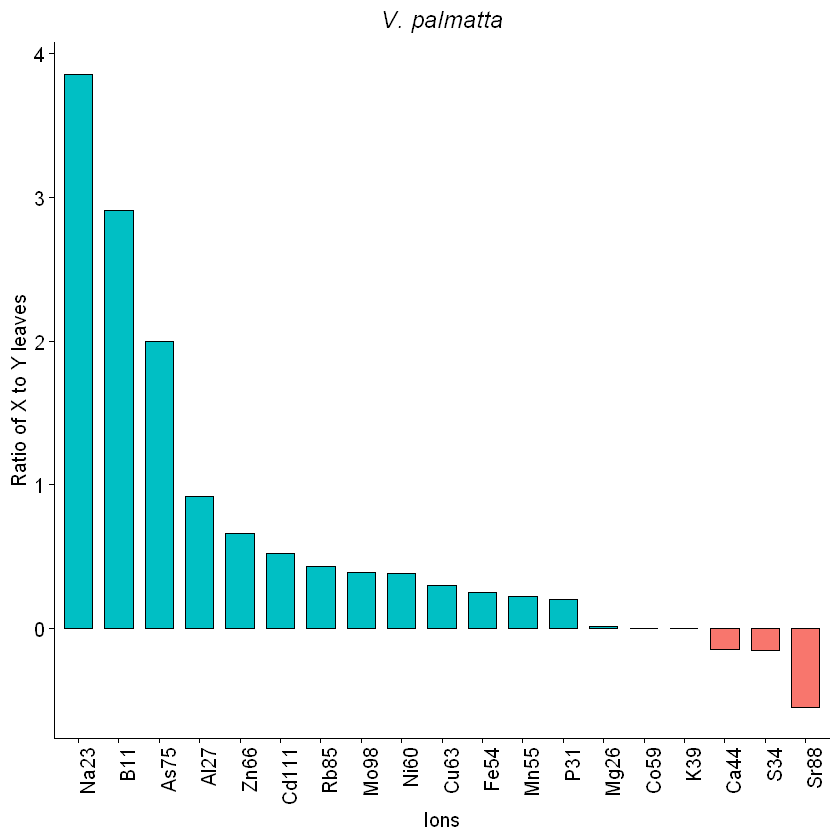

In [45]:
e <- ggbarplot(palmata_xy_avg, y = "avg", x = "ions",
               sort.val = "desc",
               fill = "grp",
               sort.by.groups = FALSE,
               x.text.angle = 90)
e <- e + ylab("Ratio of X to Y leaves")
e <- e + xlab("Ions")
e <- e + labs(title = "V. palmatta")
e <- e + theme(plot.title = element_text(hjust = .5, face = "italic"), legend.position = "none")
e

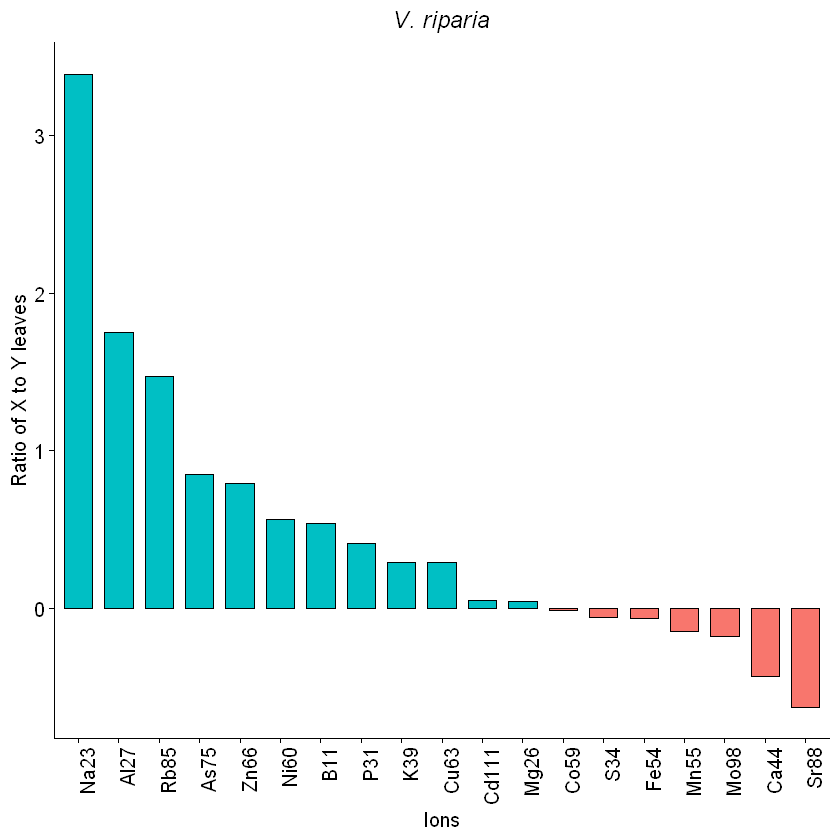

In [46]:
f <- ggbarplot(riparia_xy_avg, y = "avg", x = "ions",
               sort.val = "desc",
               fill = "grp",
               sort.by.groups = FALSE,
               x.text.angle = 90)
f <- f + ylab("Ratio of X to Y leaves")
f <- f + xlab("Ions")
f <- f + labs(title = "V. riparia")
f <- f + theme(plot.title = element_text(hjust = .5, face = "italic"), legend.position = "none")
f

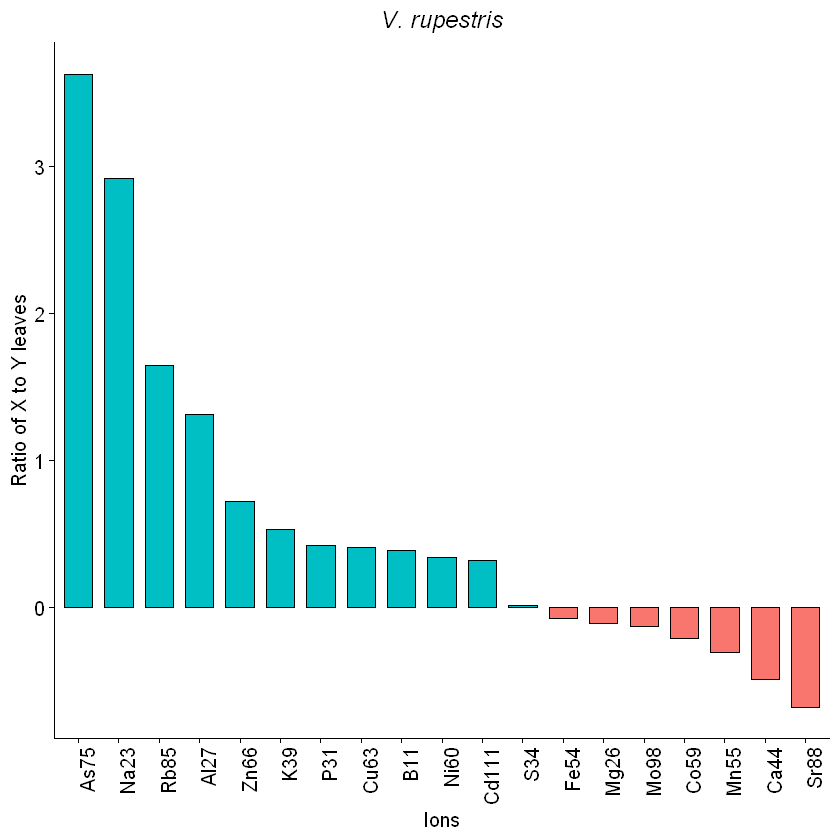

In [47]:
g <- ggbarplot(rupestris_xy_avg, y = "avg", x = "ions",
               sort.val = "desc",
               fill = "grp",
               sort.by.groups = FALSE,
               x.text.angle = 90)
g <- g + ylab("Ratio of X to Y leaves")
g <- g + xlab("Ions")
g <- g + labs(title = "V. rupestris")
g <- g + theme(plot.title = element_text(hjust = .5, face = "italic"), legend.position = "none")
g

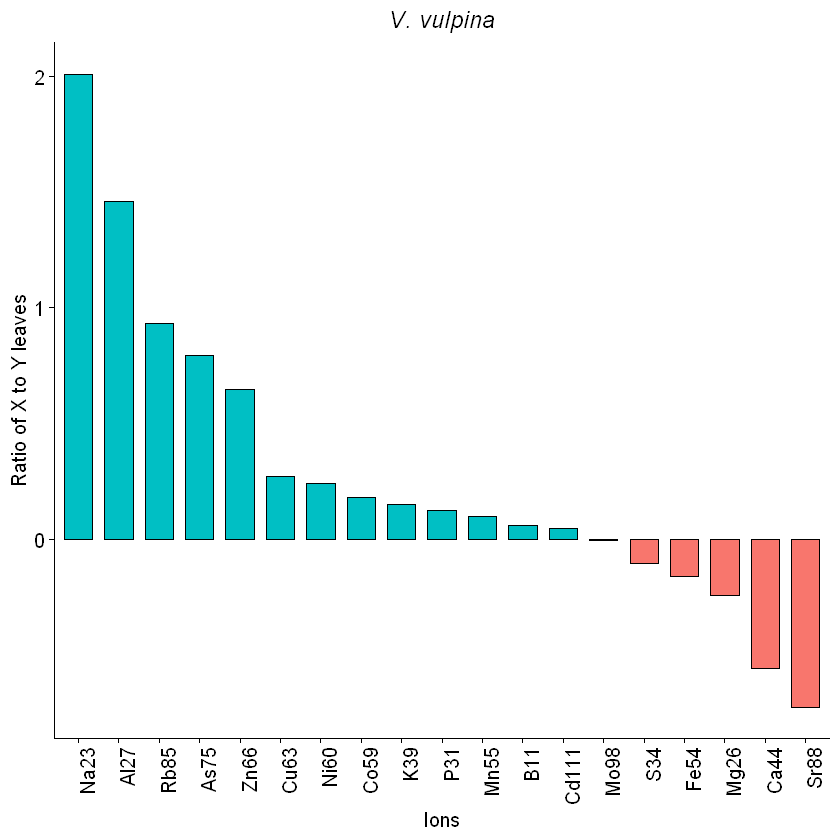

In [48]:
h <- ggbarplot(vulpina_xy_avg, y = "avg", x = "ions",
               sort.val = "desc",
               fill = "grp",
               sort.by.groups = FALSE,
               x.text.angle = 90)
h <- h + ylab("Ratio of X to Y leaves")
h <- h + xlab("Ions")
h <- h + labs(title = "V. vulpina")
h <- h + theme(plot.title = element_text(hjust = .5, face = "italic"), legend.position = "none")
h

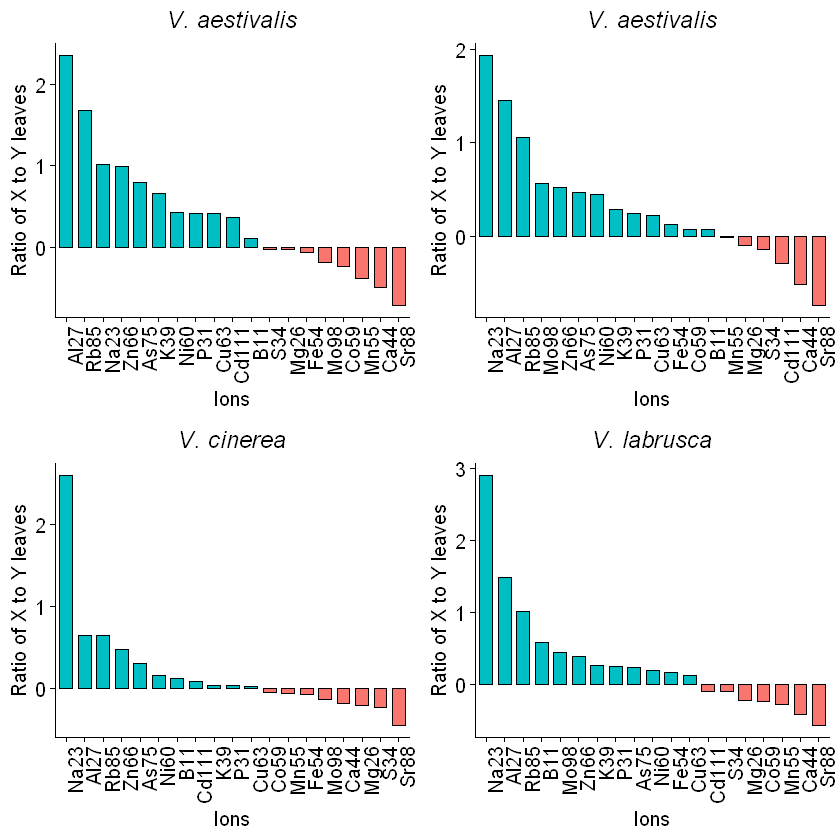

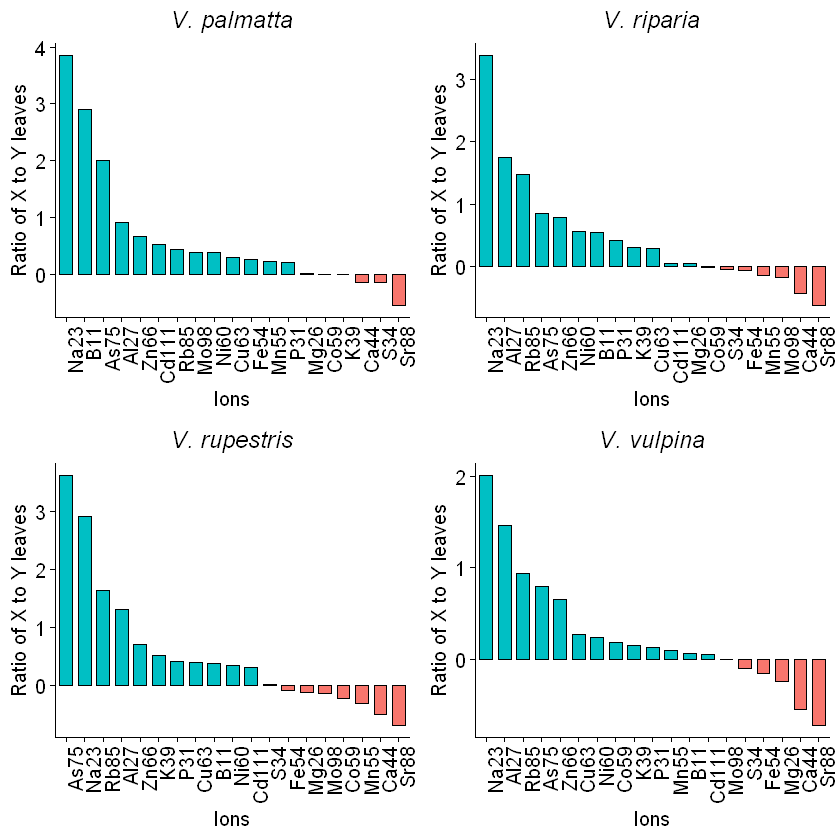

In [49]:
p <- plot_grid(a,b,c,d)
q <- plot_grid(e,f,g,h)
p
q